# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [ ]:
!pip install pandas

And now we can import this package like so:

In [ ]:
import pandas as pd

---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [ ]:
path = "/content/drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [ ]:
print("\nSummary of the DataFrame:")
print(df.info())
print("\nData types of each column:")
print(df.dtypes)
print("\nNumber of null values in each column:")
print(df.isnull().sum())
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
None

Data types of each column:
transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

Number of null values in e

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots are shown in the notebook
%matplotlib inline

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
    corr = data.corr()

    # Apply background gradient style
    styled_corr = corr.style.background_gradient(cmap='coolwarm')

    # Display the styled correlation matrix
    return styled_corr



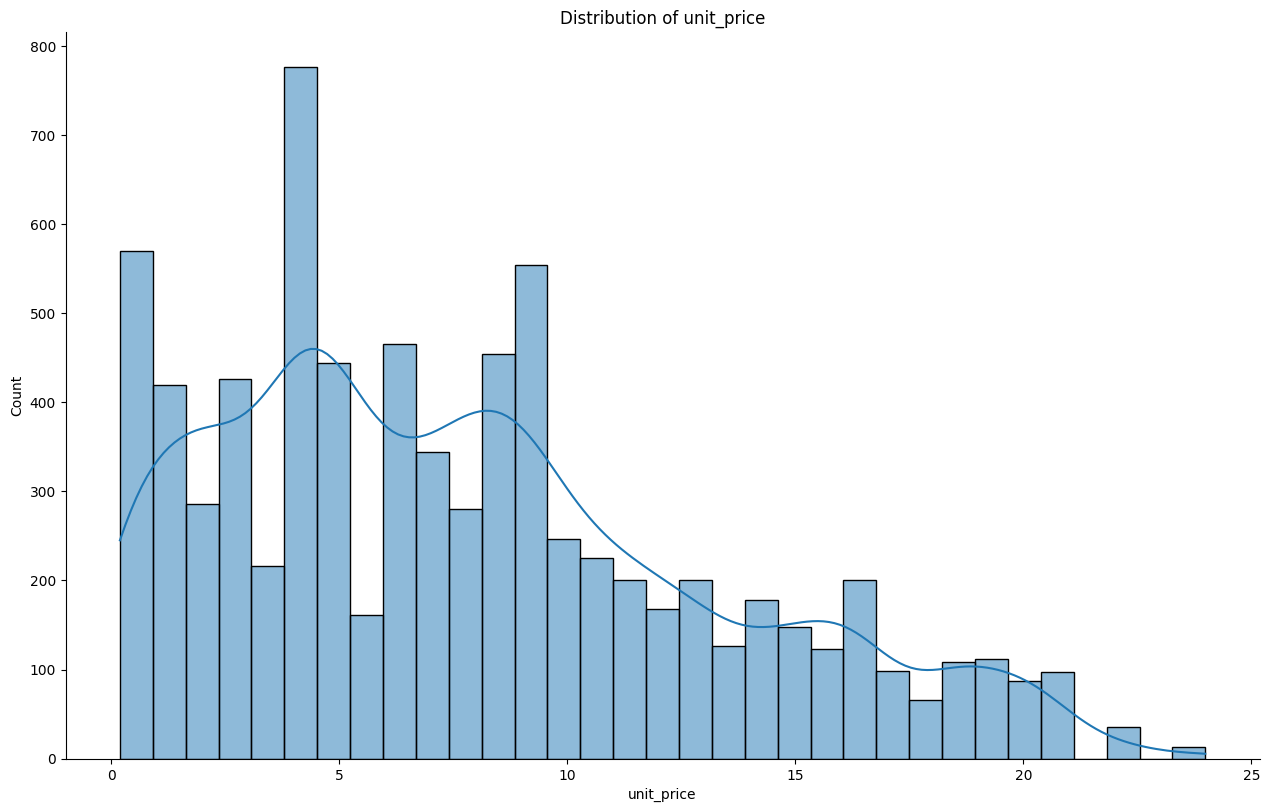

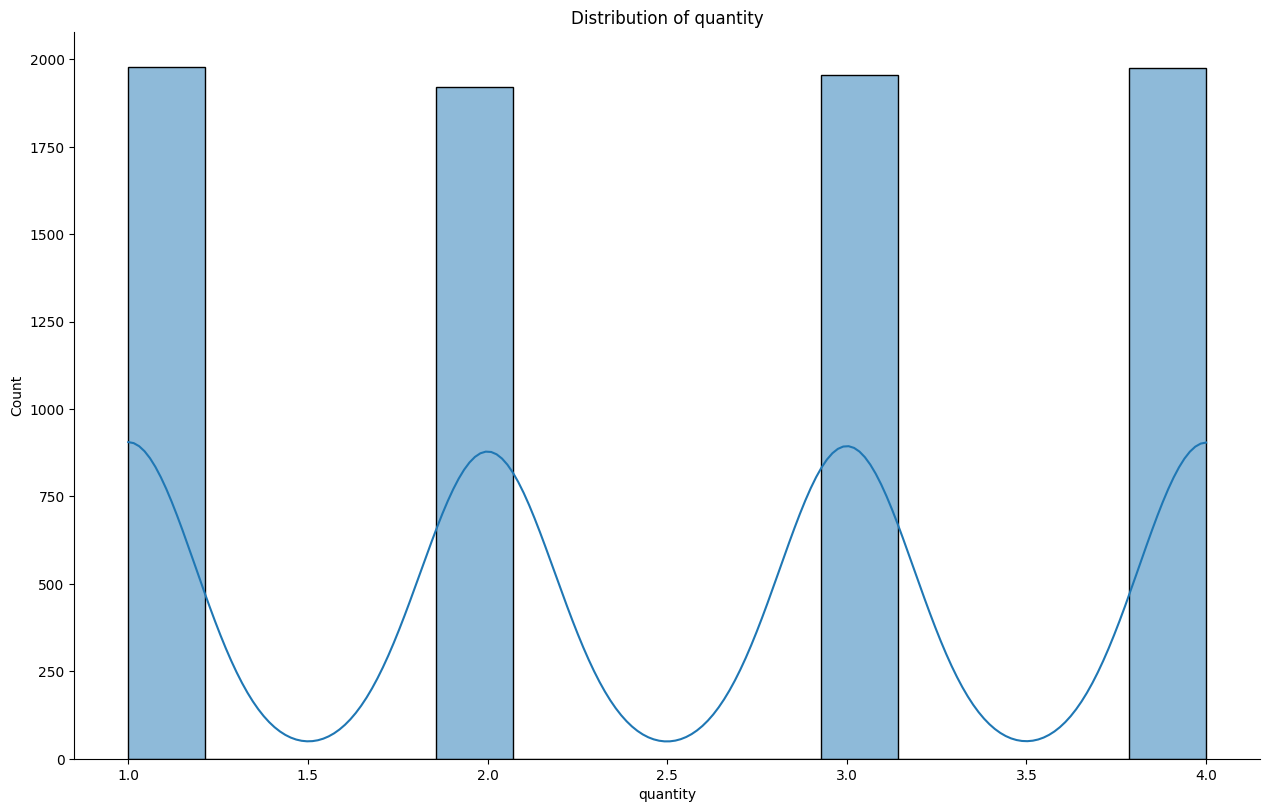

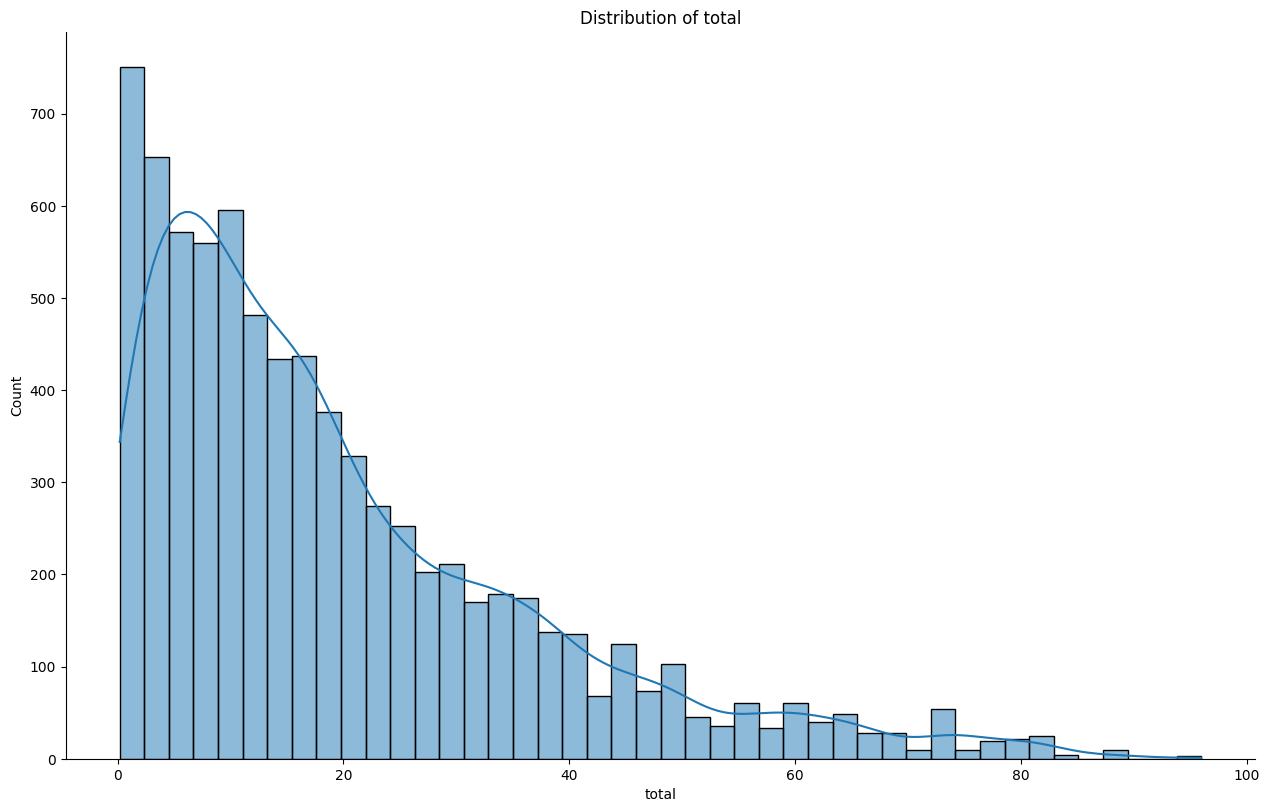

In [ ]:
plot_continuous_distribution(data=df, column='unit_price', height=8)
plot_continuous_distribution(data=df, column='quantity', height=8)
plot_continuous_distribution(data=df, column='total', height=8)

In [ ]:
get_unique_values(df, "product_id")
get_unique_values(df, "category")
get_unique_values(df, "customer_type")
get_unique_values(df, "payment_type")

Column: product_id has 300 unique values

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64
Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264

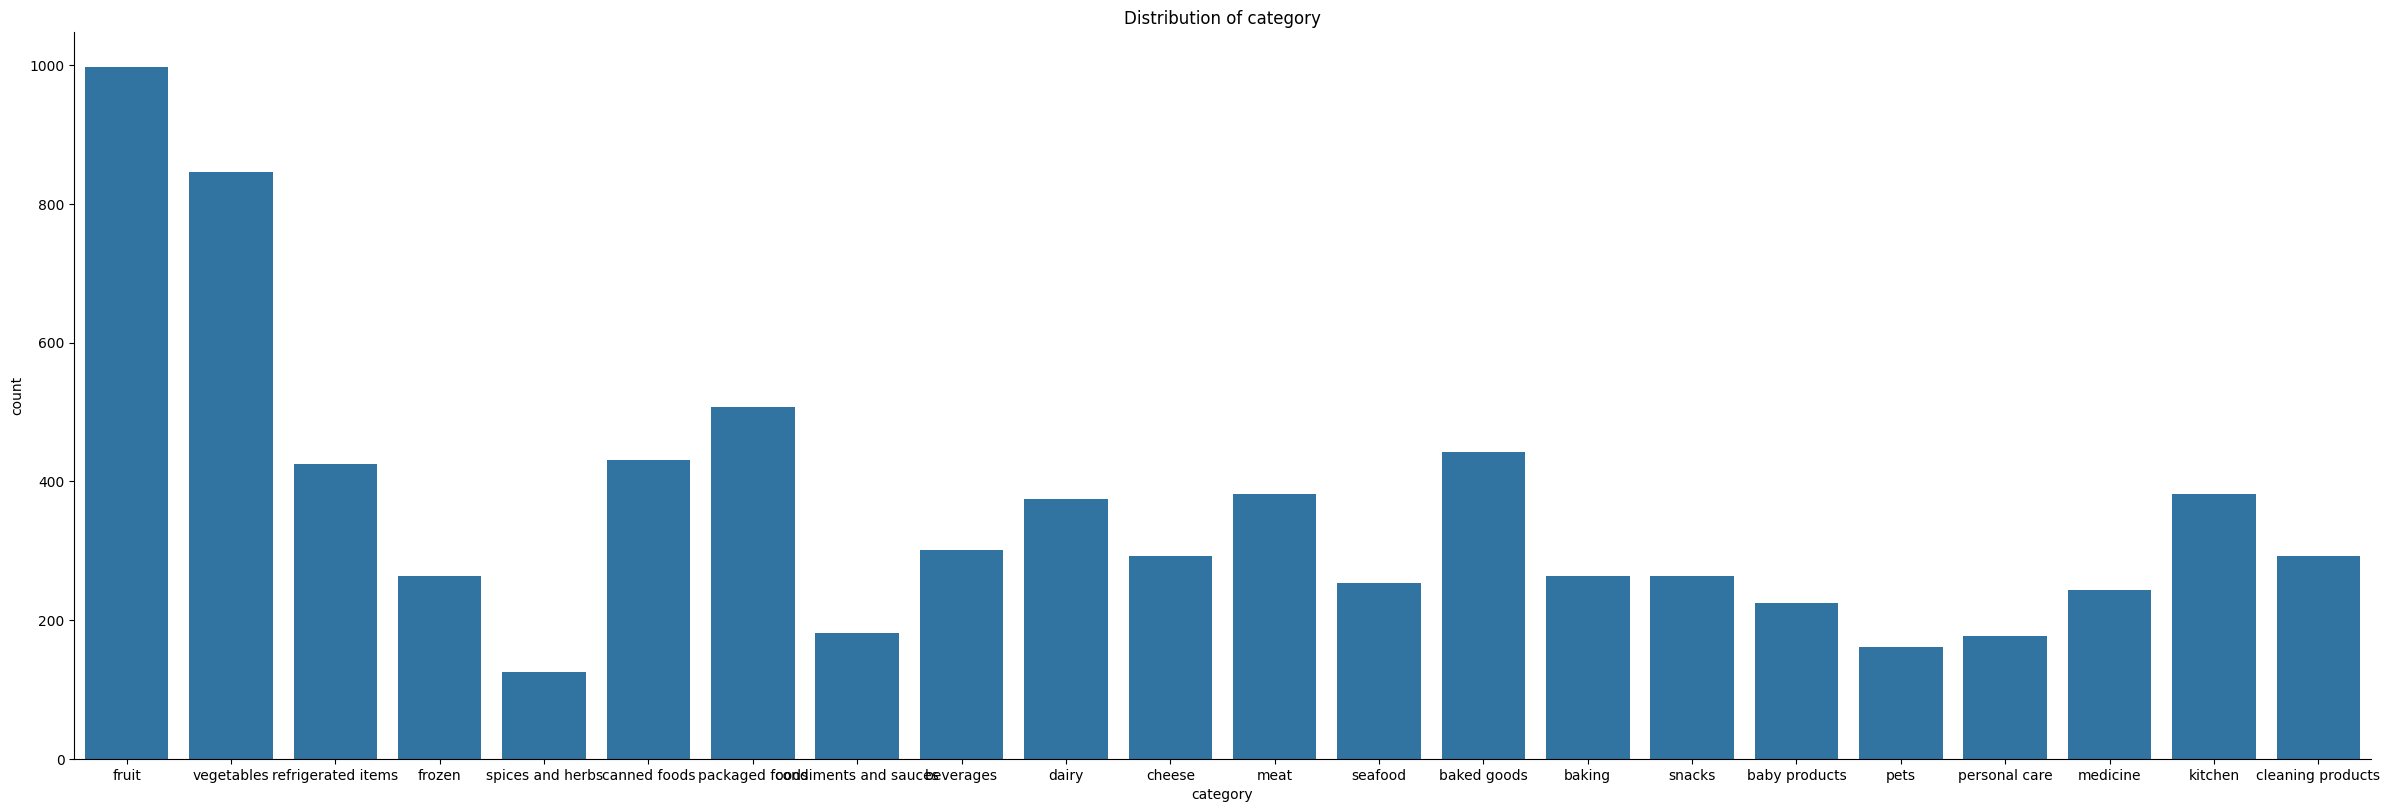

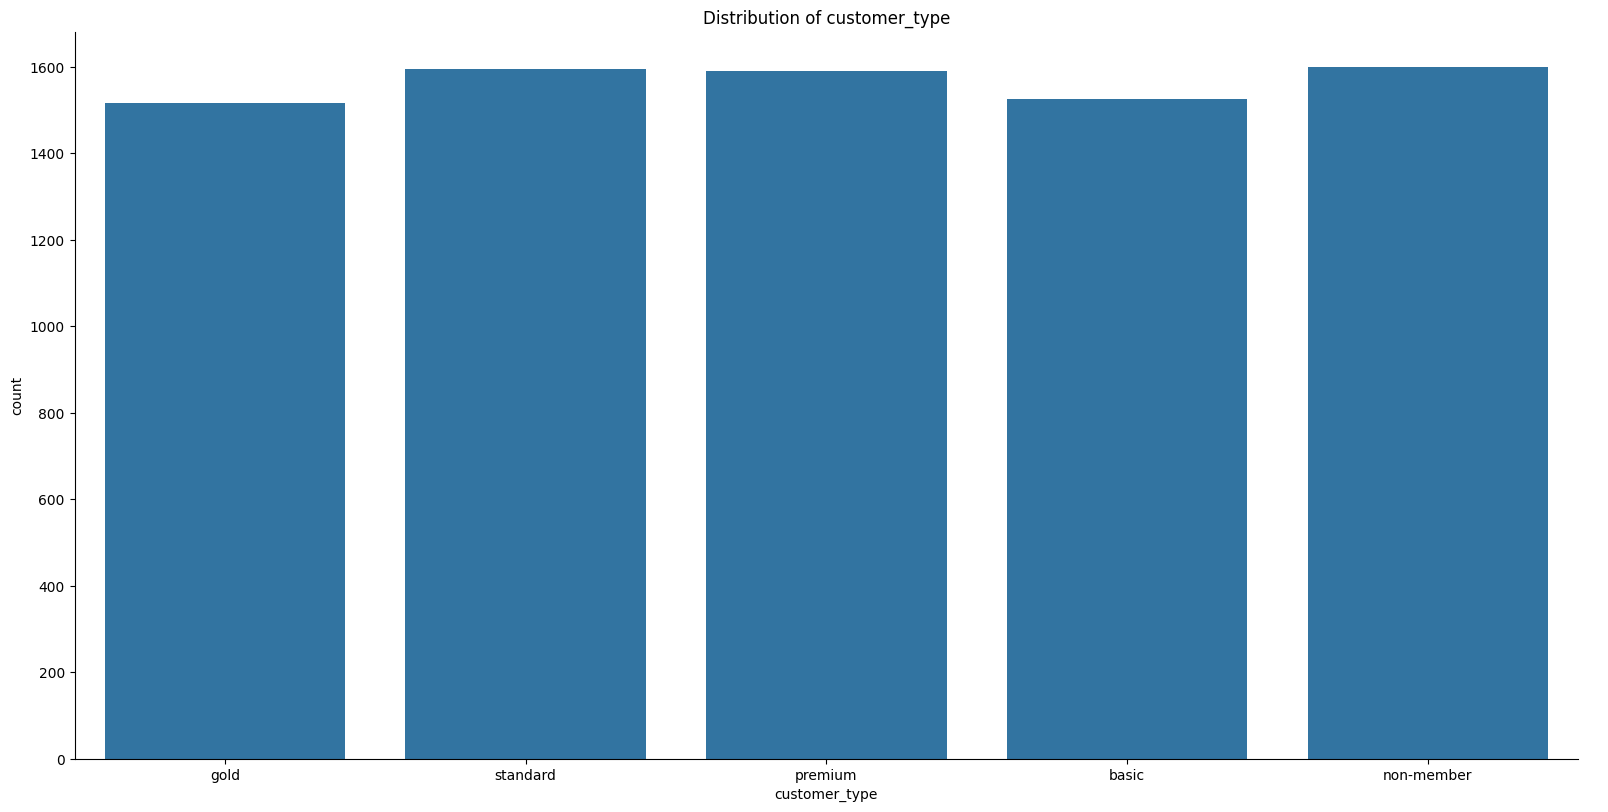

In [ ]:
plot_categorical_distribution(data=df, column="category", height=8, aspect=3)
plot_categorical_distribution(data=df, column="customer_type", height=8, aspect=2)

In [ ]:
for col in ['unit_price', 'quantity', 'total']:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'unit_price': [ 3.99  0.19  4.49  1.49  0.49  4.99  1.99  1.19  4.19  2.49  3.49  5.99
  6.49  8.19  8.99 10.99  7.19  6.19  6.99  3.19 12.49  7.49 13.49 11.19
 11.49 13.19 11.99  9.49 13.99  5.49  5.19  2.19  2.99  8.49  7.99  9.19
  9.99 20.19 15.99 14.49 14.19 16.49 16.19 15.19 10.49 19.99 14.99 12.19
 20.49 18.49 18.19 10.19 19.19 19.49 12.99 17.99 16.99 21.99 23.99 15.49
 22.19 20.99 18.99 17.19]
Unique values in 'quantity': [2 1 4 3]
Unique values in 'total': [ 7.98  3.99  0.38  0.76  8.98 15.96  5.96  1.47  4.99 14.97  1.96  0.49
  1.49 11.97 13.47 17.96  9.98  0.19  0.57  4.47  2.98 19.96  4.49  0.98
  7.96  4.76  5.97  3.57  3.98 16.76  2.49  8.38  4.19  2.38  1.99  1.19
  9.96  7.47  4.98 12.57  3.49  5.99  6.49 24.57 26.97 32.76 43.96 25.96
 17.98 16.38  7.19 10.47 32.97 12.38 17.97 19.47 10.99  6.99  6.19  8.99
 24.76 14.38 12.98 12.76 13.98 11.98 23.96 20.97 35.96  6.38  6.98 13.96
  8.19  9.57 28.76  3.19 27.96 21.98 21.57 18.57 24.98 29.96 53.96 26.98
 1

In [ ]:
numeric_columns = ['unit_price', 'quantity', 'total']
correlation_plot(data=df[numeric_columns])


,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000


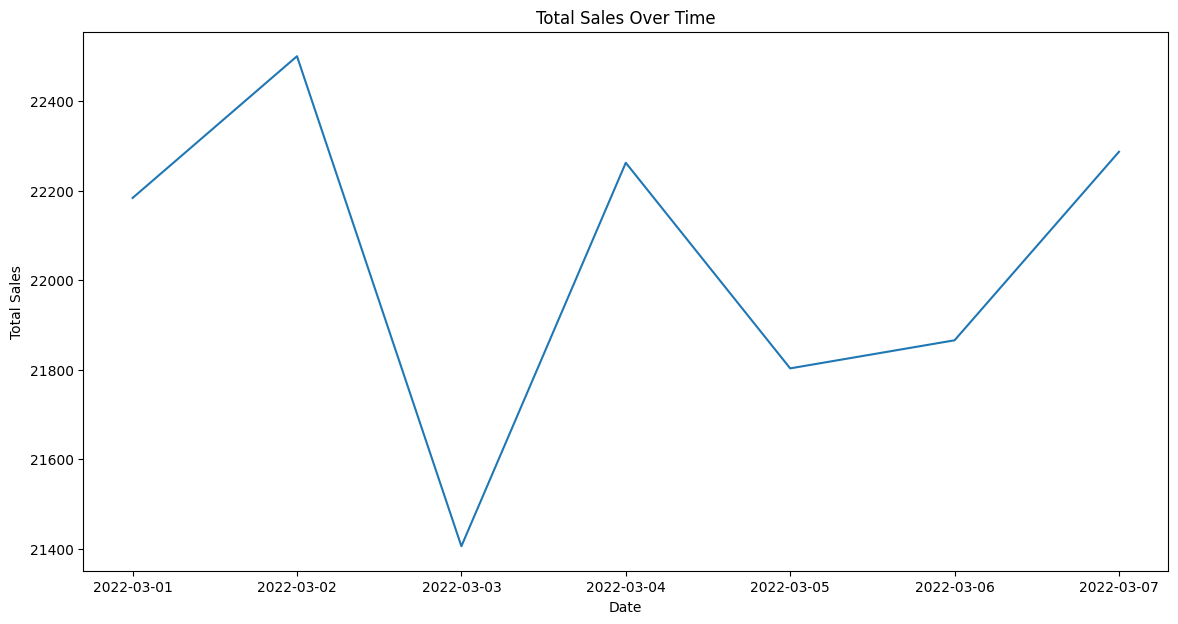

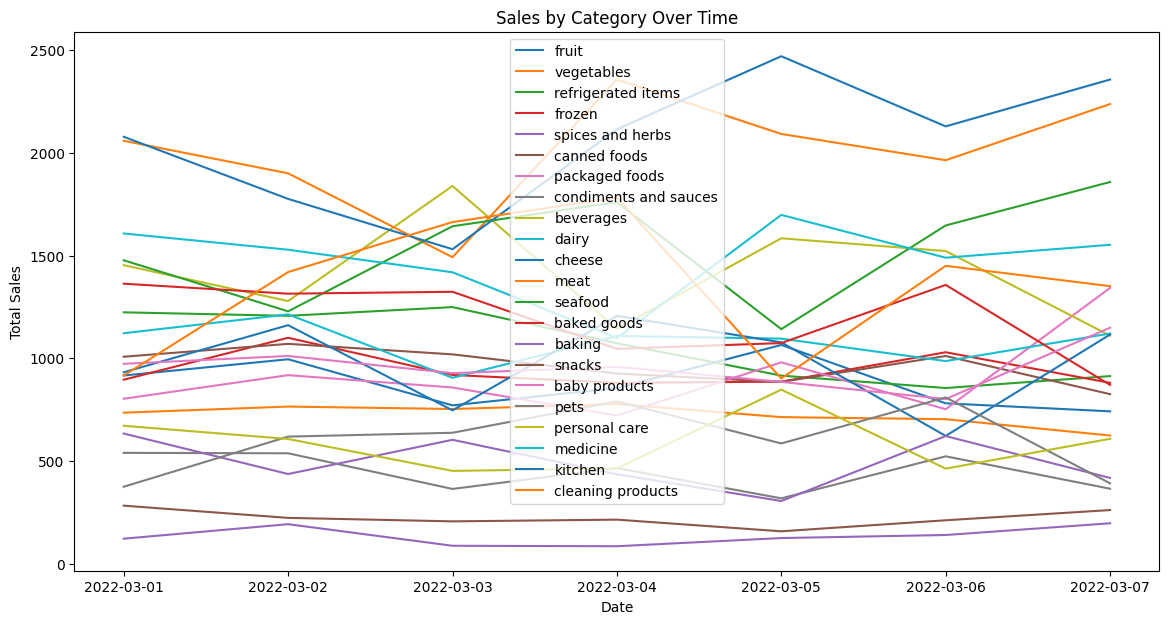

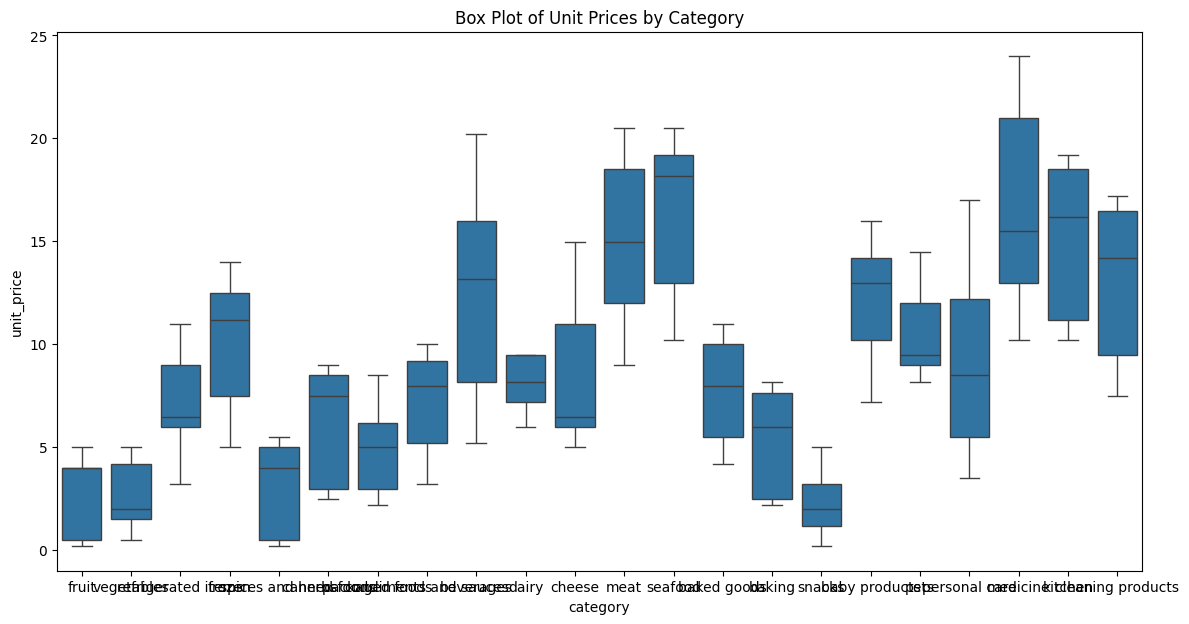

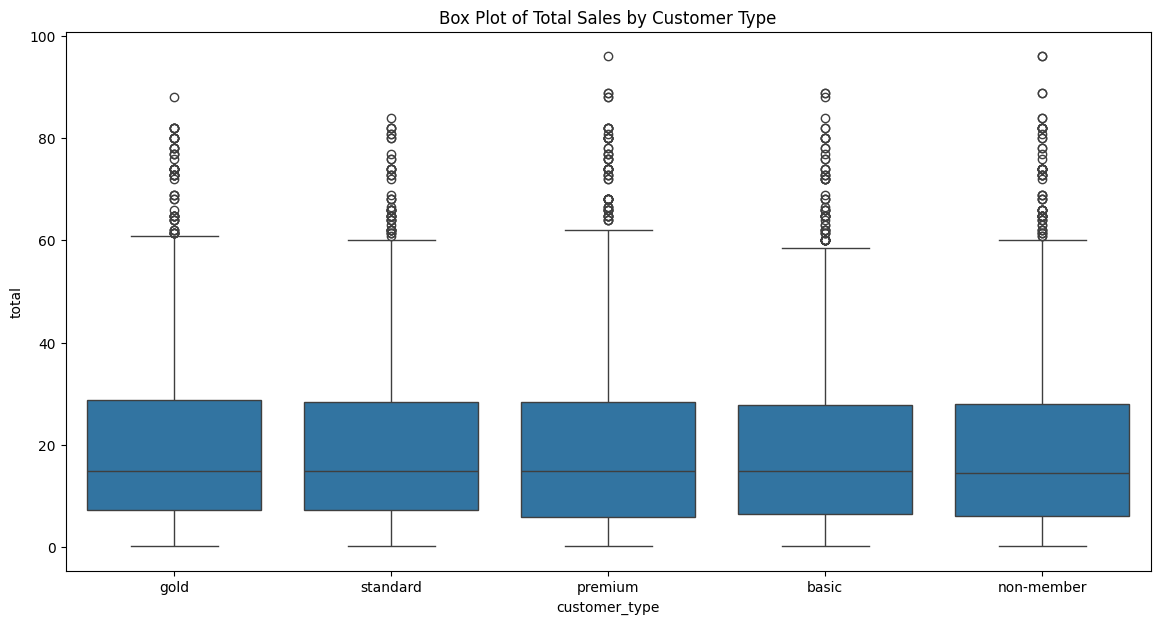

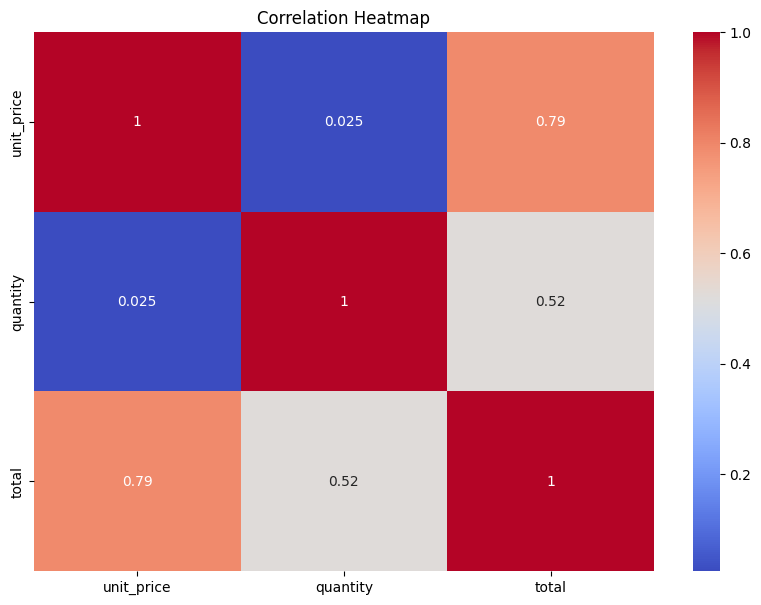

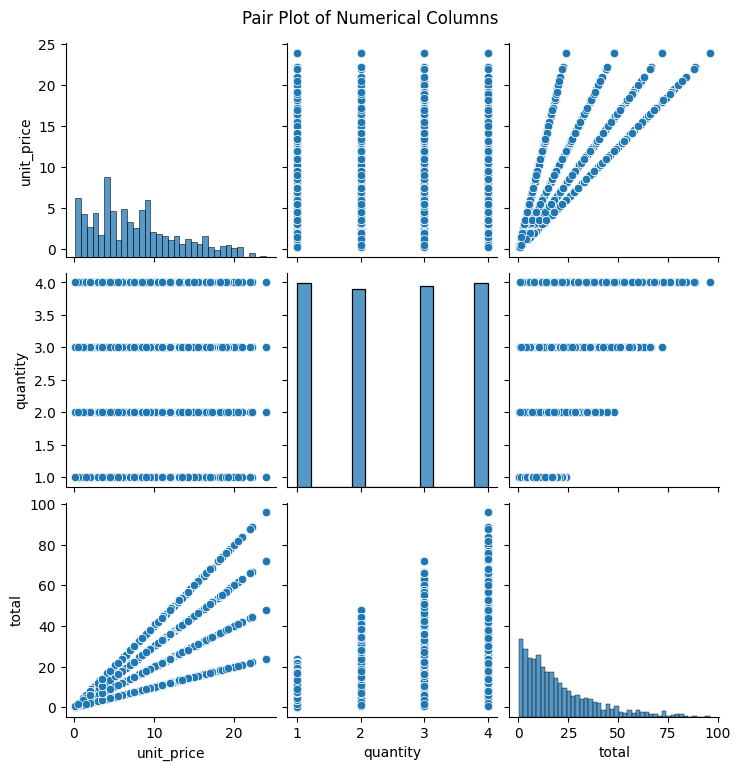

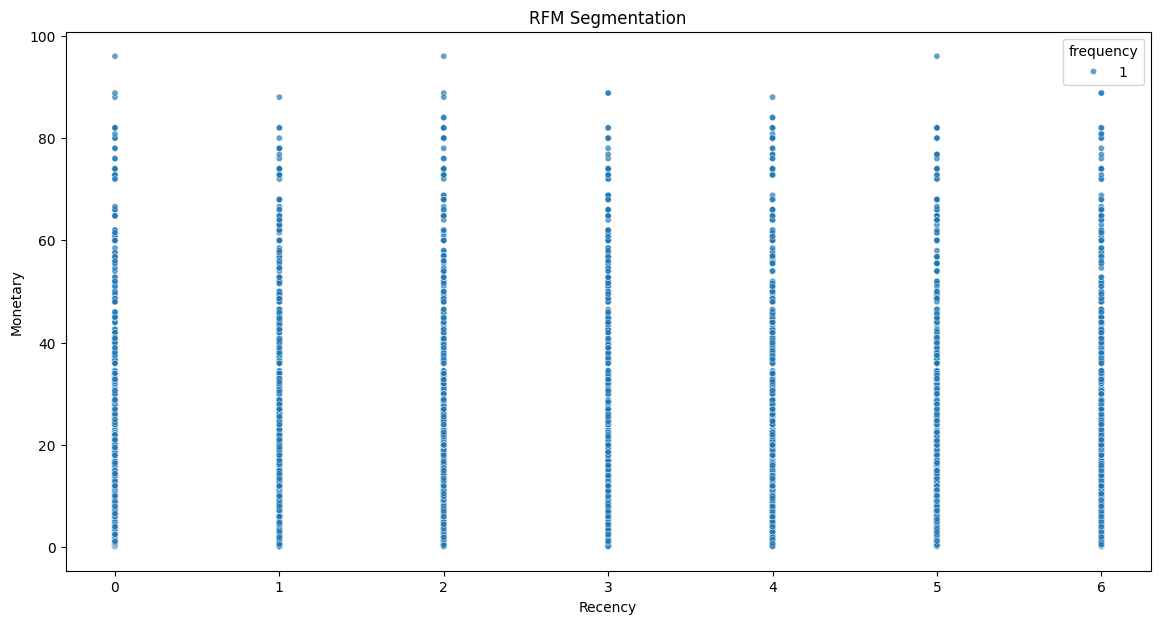

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Time Series Analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sales Over Time
plt.figure(figsize=(14, 7))
df.groupby(df['timestamp'].dt.date)['total'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Sales by Category Over Time
plt.figure(figsize=(14, 7))
for category in df['category'].unique():
    df[df['category'] == category].groupby(df['timestamp'].dt.date)['total'].sum().plot(label=category)
plt.title('Sales by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Box Plots
plt.figure(figsize=(14, 7))
sns.boxplot(x='category', y='unit_price', data=df)
plt.title('Box Plot of Unit Prices by Category')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='customer_type', y='total', data=df)
plt.title('Box Plot of Total Sales by Customer Type')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(df[['unit_price', 'quantity', 'total']])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

# Customer Segmentation (RFM Analysis)
import datetime as dt

# Recency
df['recency'] = (df['timestamp'].max() - df['timestamp']).dt.days

# Frequency and Monetary
rfm = df.groupby('transaction_id').agg({
    'recency': 'min',
    'transaction_id': 'count',
    'total': 'sum'
}).rename(columns={'transaction_id': 'frequency', 'total': 'monetary'}).reset_index()

# Plot RFM Segments
plt.figure(figsize=(14, 7))
sns.scatterplot(data=rfm, x='recency', y='monetary', size='frequency', sizes=(20, 200), alpha=0.7)
plt.title('RFM Segmentation')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()


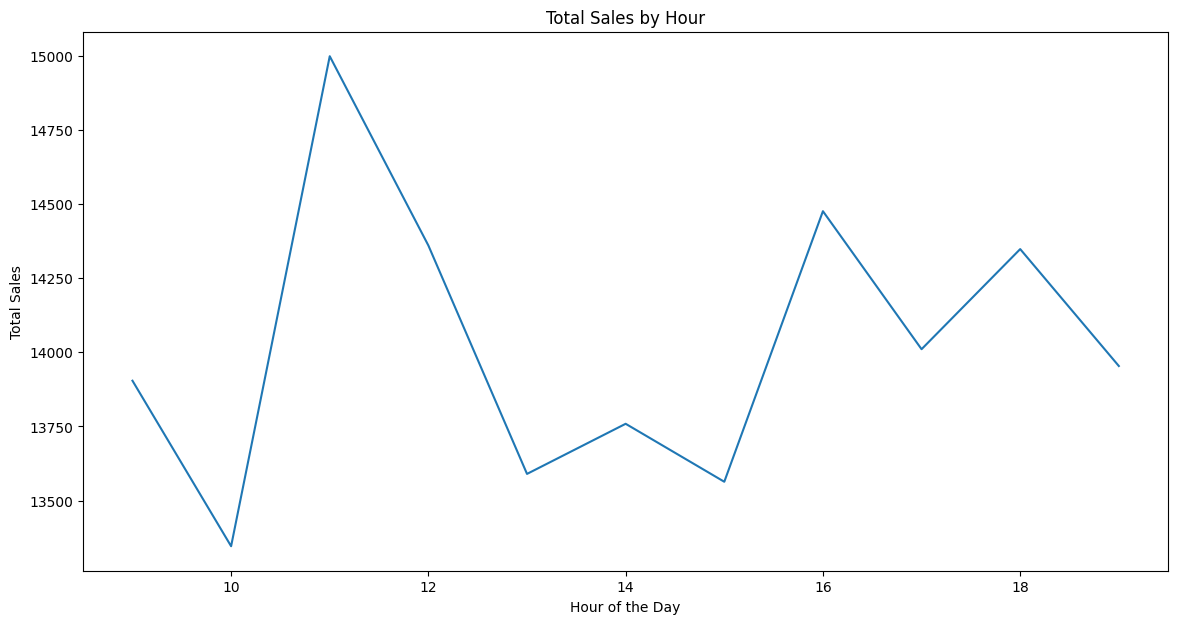

In [ ]:
plt.figure(figsize=(14, 7))
df.groupby(df['timestamp'].dt.hour)['total'].sum().plot()
plt.title('Total Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.show()

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

Here is the complete email summary incorporating the analysis findings and recommendations:

---

Dear Data Science Team Leader,

I have completed the analysis of our sales data and have summarized the findings below:

### Summary of Findings

1. **Total Sales Over Time**:
   - **Highest Sales Day**: The highest sales were recorded on 2022-03-02.
   - **Hourly Sales Trends**: Sales peak around 11 AM, drop in the afternoon, and then pick up again after 3:30 PM.

2. **Sales by Category Over Time**:
   - **Category Trends**: Each product category shows distinct sales trends over the analyzed period.

3. **Box Plots**:
   - **Unit Prices by Category**: The distribution of unit prices varies across categories, with some categories having higher or more variable pricing.
   - **Total Sales by Customer Type**: Different customer types exhibit varying spending behaviors, impacting total sales.

4. **Correlation Matrix**:
   - **Uniform Correlations**: The correlation matrix shows strong uniformity, particularly a high correlation between `unit_price` and `total`, and a moderate correlation between `quantity` and `total`.

5. **Customer Segmentation (RFM Analysis)**:
   - **High-Value Customers**: Identified high-value customers who purchase frequently, recently, and have high monetary values.

### Recommendations

1. **Hourly Sales Analysis**:
   - Adjust staffing levels to ensure adequate coverage during peak sales times (around 11 AM and after 3:30 PM).
   - Optimize inventory restocking schedules to ensure that shelves are fully stocked before peak sales times.

2. **Dynamic Pricing Strategies**:
   - Implement dynamic pricing strategies for categories with high price variability to maximize revenue.

3. **Customer-Specific Stocking**:
   - Stock items preferred by high-value customers to retain them and boost sales.
   - Implement targeted promotions for customer types with lower recency to encourage repeat purchases.

4. **Monitor Correlation Trends**:
   - Continuously monitor the correlation trends as more data becomes available to identify any changes and adjust stocking strategies accordingly.

By leveraging these insights and implementing the recommended actions, we can better stock the items to meet customer demand, minimize stockouts, and optimize inventory levels.

Best regards,
Supritha Reddypelli


